# Дерево решений

In [4]:
import pandas as pd
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn import metrics

data = pd.read_csv('train.csv')
data.describe()

,v.id,on road old,on road now,years,km,rating,condition,economy,top speed,hp,torque,current price
count,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.00000,1000.000000,1000.00000
mean,500.500000,601648.286000,799131.3970,4.561000,100274.430000,2.988000,5.592000,11.625000,166.89300,84.54600,103.423000,308520.24250
std,288.819436,58407.246204,57028.9502,1.719079,29150.463233,1.402791,2.824449,2.230549,19.28838,20.51694,21.058716,126073.25915
min,1.000000,500265.000000,700018.0000,2.000000,50324.000000,1.000000,1.000000,8.000000,135.00000,50.00000,68.000000,28226.50000
25%,250.750000,548860.500000,750997.7500,3.000000,74367.500000,2.000000,3.000000,10.000000,150.00000,67.00000,85.000000,206871.75000
50%,500.500000,601568.000000,798168.0000,5.000000,100139.500000,3.000000,6.000000,12.000000,166.00000,84.00000,104.000000,306717.75000
75%,750.250000,652267.250000,847563.2500,6.000000,125048.000000,4.000000,8.000000,13.000000,184.00000,102.00000,121.000000,414260.87500
max,1000.000000,699859.000000,899797.0000,7.000000,149902.000000,5.000000,10.000000,15.000000,200.00000,120.00000,140.000000,584267.50000


In [5]:
x = data[['km', 'years', 'current price', 'condition']].values
y = data['rating'].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

[Text(0.7189105682742509, 0.9827586206896551, 'X[2] <= 472957.5\ngini = 0.8\nsamples = 800\nvalue = [161, 161, 161, 165, 152]'),
 Text(0.516967625652618, 0.9482758620689655, 'X[0] <= 95026.0\ngini = 0.799\nsamples = 717\nvalue = [150, 146, 128, 148, 145]'),
 Text(0.29968645959443097, 0.9137931034482759, 'X[2] <= 275357.75\ngini = 0.789\nsamples = 275\nvalue = [64, 45, 36, 59, 71]'),
 Text(0.2972651520883777, 0.8793103448275862, 'gini = 0.0\nsamples = 3\nvalue = [3, 0, 0, 0, 0]'),
 Text(0.30210776710048426, 0.8793103448275862, 'X[0] <= 94412.5\ngini = 0.79\nsamples = 272\nvalue = [61, 45, 36, 59, 71]'),
 Text(0.29968645959443097, 0.8448275862068966, 'X[0] <= 90380.5\ngini = 0.791\nsamples = 268\nvalue = [61, 45, 36, 59, 67]'),
 Text(0.23405814921307505, 0.8103448275862069, 'X[0] <= 89439.0\ngini = 0.79\nsamples = 236\nvalue = [59, 41, 31, 48, 57]'),
 Text(0.14831454297820823, 0.7758620689655172, 'X[2] <= 392778.0\ngini = 0.791\nsamples = 228\nvalue = [53, 40, 30, 48, 57]'),
 Text(0.0478

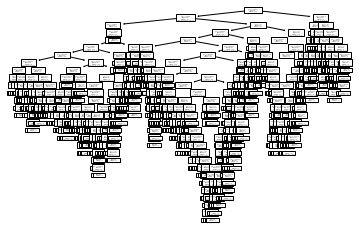

In [6]:
# создаем объект модели на основе дерева
clf = DecisionTreeClassifier()
# обучаем ее
clf.fit(x_train, y_train)
# отображаем дерево
tree.plot_tree(clf)

In [10]:
y_pred = clf.predict(x_test)
# Оценка качества модели
print('Accuracy training: {:.3f}' .format(clf.score(x_train, y_train)))
print('Accuracy test: {:.3f}' .format(clf.score(x_test, y_test)))

Accuracy training: 1.000
Accuracy test: 0.215


In [15]:
# from sklearn.externals.six import StringIO
# from sklearn import externals
# from IPython.display import Image
# import pydotplus

# dot_data = StringIO()
# export_graphviz(clf, out_file = dot_data,
#                filled = True, rounded = True,
#                special_characters=True,feature_names=feature_cols,class_names=['0', '1'])
# graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
# graph.write_png('train.png')
# Image(graph.create_png())

ModuleNotFoundError: No module named 'pydotplus'

# Случайный лес

In [17]:
from sklearn.ensemble import RandomForestClassifier
# создаем объект модели случайного леса 
random_forrest = RandomForestClassifier(n_estimators=100, random_state=42)
# обучаем
random_forrest.fit(x_train, y_train)
# предсказание целевой переменной 
y_pred = random_forrest.predict(x_test)
# Оценка качества модели
print('Accuracy training: {:.3f}' .format(clf.score(x_train, y_train)))

Accuracy training: 1.000


# Градиентный бустинг

In [32]:
from sklearn.ensemble import GradientBoostingClassifier

# создаем модель градиентного бустинга
model = GradientBoostingClassifier()
# обучаем ее, т.е. создаем градиентный бустинг
model.fit(x_train, y_train)
# предсказание целевой переменной на тестовых данных 
y_pred = random_forrest.predict(x_test)
# Оценка качества модели на тестовых данных
print('Accuracy test: {:.3f}' .format(model.score(x_test, y_test)))

Accuracy test: 0.255


In [33]:
from catboost import CatBoostClassifier

# создаем объект модели CatBoostRegressor на основе градиентного бустинга
model = CatBoostClassifier(iterations=100, # iterations - количество итераций
                          learning_rate=0.05, # learning_rate - скорость обучения
                          depth=10, # depth - глубина дерева
                          custom_loss='AUC') # loss_function - функция потерь, в данном случае выбрана AUC (точность)

In [34]:
# обучаем ее, т.е. создаем градиентный бустинг
model.fit(x_train, y_train)
# предсказание целевой переменной на тестовых данных 
y_pred = model.predict(x_test)

0:	learn: 1.6043510	total: 107ms	remaining: 10.6s
1:	learn: 1.5982834	total: 228ms	remaining: 11.2s
2:	learn: 1.5926549	total: 344ms	remaining: 11.1s
3:	learn: 1.5871563	total: 453ms	remaining: 10.9s
4:	learn: 1.5815224	total: 567ms	remaining: 10.8s
5:	learn: 1.5763896	total: 682ms	remaining: 10.7s
6:	learn: 1.5701219	total: 793ms	remaining: 10.5s
7:	learn: 1.5655015	total: 922ms	remaining: 10.6s
8:	learn: 1.5604625	total: 1.03s	remaining: 10.4s
9:	learn: 1.5561851	total: 1.15s	remaining: 10.3s
10:	learn: 1.5511835	total: 1.26s	remaining: 10.2s
11:	learn: 1.5463773	total: 1.36s	remaining: 10s
12:	learn: 1.5419127	total: 1.48s	remaining: 9.88s
13:	learn: 1.5356422	total: 1.58s	remaining: 9.73s
14:	learn: 1.5304704	total: 1.69s	remaining: 9.6s
15:	learn: 1.5251522	total: 1.81s	remaining: 9.49s
16:	learn: 1.5231894	total: 1.81s	remaining: 8.84s
17:	learn: 1.5187845	total: 1.92s	remaining: 8.74s
18:	learn: 1.5137272	total: 2.04s	remaining: 8.68s
19:	learn: 1.5089766	total: 2.15s	remaining:

In [35]:
# Оценка качества модели на тестовых данных
print('Accuracy test: {:.3f}' .format(model.score(x_test, y_test)))

Accuracy test: 0.225
